In [1]:
import numpy as np
from myplotstyle import plt, get_figsize

from easyquery import Query, QueryMaker
import SAGA
from SAGA import ObjectCuts as C
from SAGA import HostCuts as H

from SAGA.utils import calc_cdf
from astropy.table import join
from collections import defaultdict

In [2]:
print(SAGA.__version__)
saga = SAGA.QuickStart()

3.0.0
SAGA `shared_dir` set to /home/yymao/Dropbox/Work/SAGA
SAGA `local_dir`  set to /home/yymao/Documents/Work/Data/SAGA


In [3]:
base = H.paper3.filter(saga.object_catalog.load_combined_base_catalog())
nhosts = len(np.unique(base["HOSTID"]))
assert nhosts == 101

In [4]:
mask = np.isfinite(base["nuv_sfr_err"])
np.median(base["nuv_sfr_err"][mask])

0.09904827

In [5]:
base["radius_phys"] = np.deg2rad(base["radius"] / 3600) * base["HOST_DIST"] * 1000
radius_phys_err_median = np.median(base["nuv_err"]/base["radius"])

In [6]:
base = Query(C.sat_rcut, C.is_host | "p_sat_corrected > 0").filter(base)

In [7]:
hosts = saga.host_catalog.load(include_stats=True, query="paper3")
hosts = join(hosts, C.is_host.filter(base), "HOSTID", uniq_col_name="{col_name}{table_name}", table_names=["", "_base"])

In [8]:
hosts["nuv_ssfr"] = hosts["nuv_sfr"] - hosts["log_sm"]

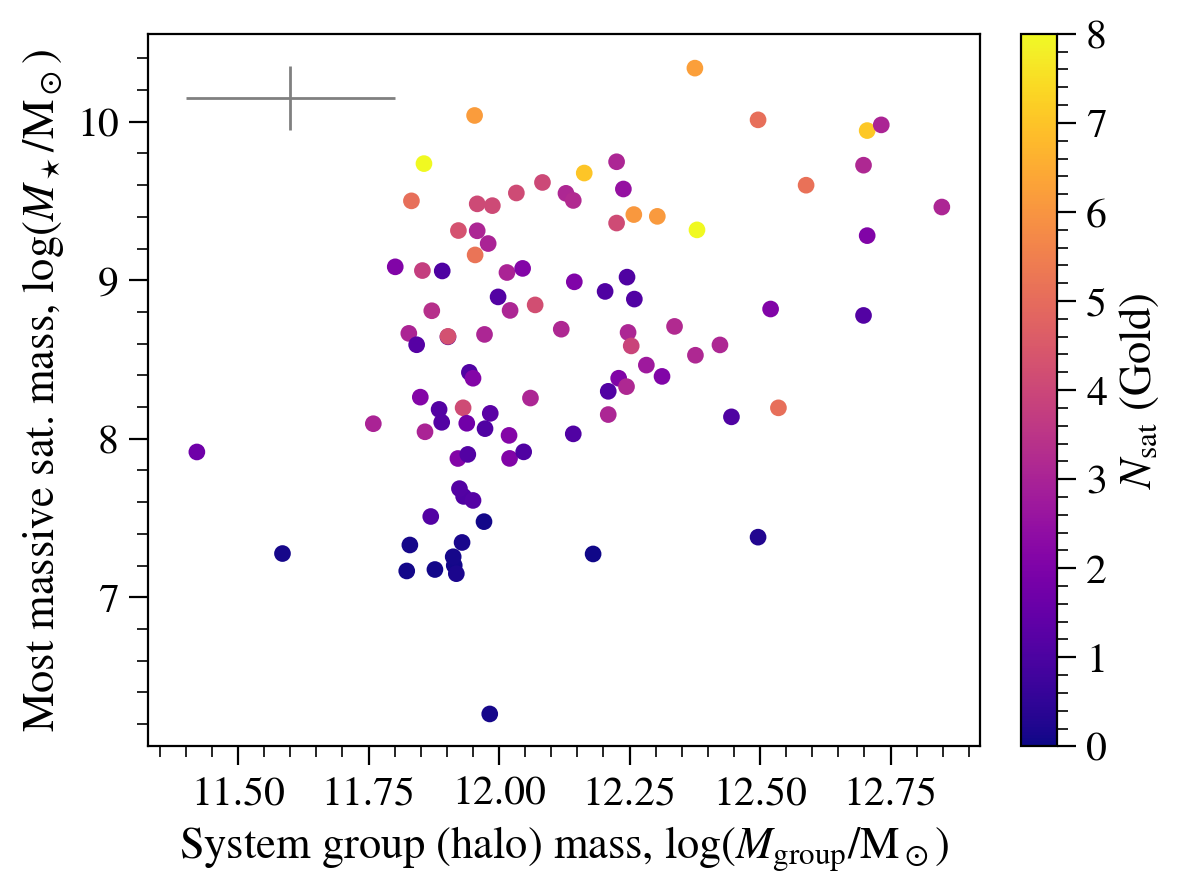

In [9]:
cs = plt.scatter(hosts["M_HALO"], hosts["most_massive_sat"], c=hosts[f"sats_gold"], vmin=0, vmax=8, cmap="plasma")

plt.colorbar(cs, label=r"$N_{\rm sat}$ (Gold)")
plt.xlabel(r"System group (halo) mass, $\log(M_{\rm group}/{\rm M}_\odot)$")
plt.ylabel(r"Most massive sat. mass, $\log(M_\star/{\rm M}_\odot)$")
plt.xticks(np.arange(11.5, 12.8, 0.25))
plt.errorbar([11.6], [10.15], xerr=[0.2], yerr=[0.2], marker='', color="grey", lw=1)
plt.savefig("plots/nsat_two_properties.pdf")

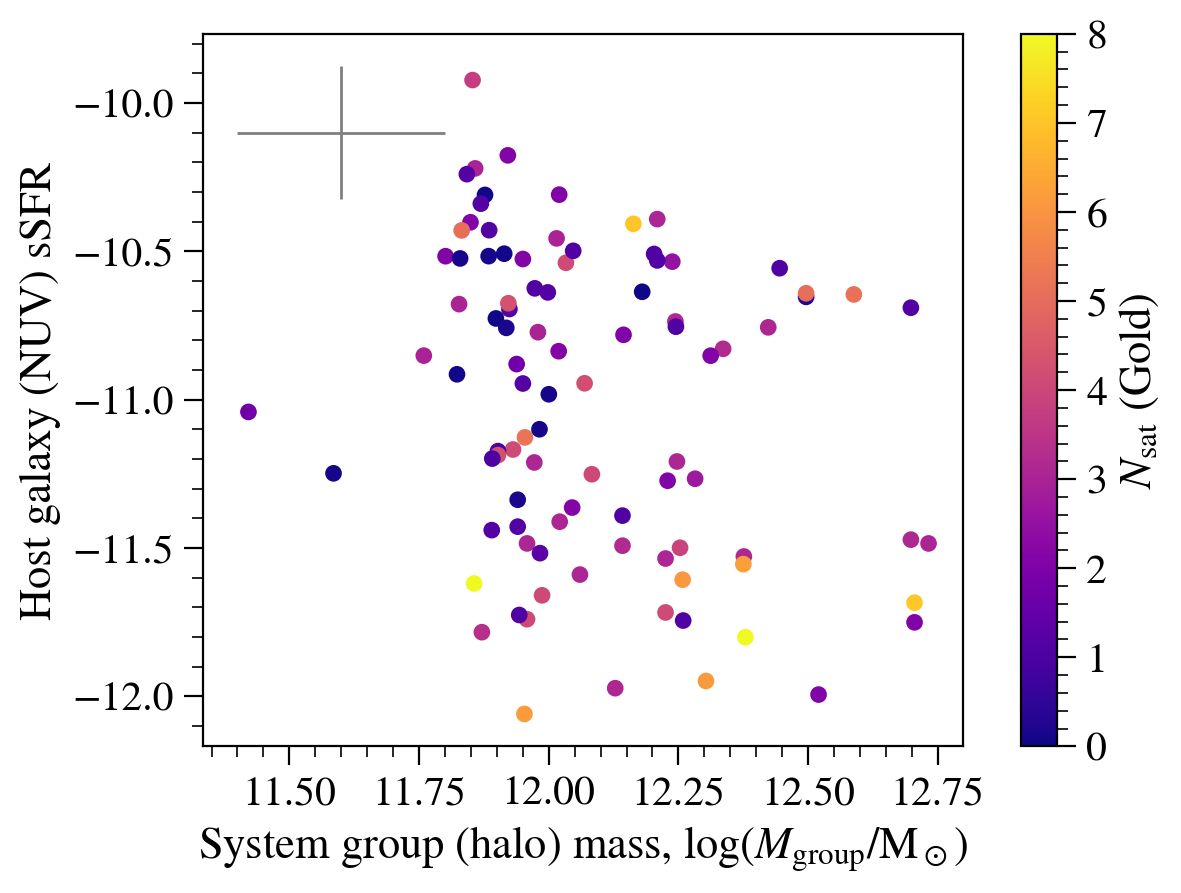

In [10]:
cs = plt.scatter(hosts["M_HALO"], hosts["nuv_ssfr"], c=hosts[f"sats_gold"], vmin=0, vmax=8, cmap="plasma")

plt.colorbar(cs, label=r"$N_{\rm sat}$ (Gold)")
plt.xlabel(r"System group (halo) mass, $\log(M_{\rm group}/{\rm M}_\odot)$")
plt.ylabel(r"Host galaxy (NUV) sSFR")
plt.xticks(np.arange(11.5, 12.8, 0.25))
plt.errorbar([11.6], [-10.1], xerr=[0.2], yerr=[np.hypot(0.2, 0.1)], marker='', color="grey", lw=1)
plt.savefig("plots/nsat_two_properties_ssfr.pdf")